Outlier detection might be fun. PyOD is a library which can be used for outlier detection. There are multiple options for OD to use: Isolation Forests (iForest), unsupervised K-Nearest Neighbors (KNN), Local Outlier Factor (LOF) and it's extension Cluster-Based Local Outlier Factor (CBLOF), One-Class Support Vector Machine (OCSVM), Copula-Based Outlier Detection (COPOD)

The outliers in the data can be assumed to be natural phenomena, something within the expected possibilities. 
It could be an interesting idea to still have a futuristic change point detection, to warn as a potential low-cyclical, high-magnitude event.

A simpleRNN might be a good start just to check things
Turns out it's not possible to have inherent knowledge of which model will perform the best, so multiple models should be carried out. RNN, LSTM, deep LSTM, GRUm, bidirectional LSTM and LSTM with
a TimeDistributed layer.

Hourly time series have trends on multiple levels (daily, monthly, yearly). It is recommended to use MSTL for decomposition.

The idea in the end is to determine if a set of feature values is bellow or after a threshold, appropriate for scuba diving. This threshold is the calmness-factor of the sea. This would mean appropriate current, appropriate waves. Maybe it would be good to also find wind speed, direction, etc. for those locations as well.

Always keep the original, non-stationary data for reference and validation. You may want to compare the performance of models trained on both stationary and non-stationary features.

Facebooks Prophet automates model creation and also has changepoint detections.

In [1]:
from configparser import ConfigParser

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('C:\\Users\\24\\Desktop\\Scraper\\scuba_scrapper\\functions')

from functions.checks_and_preprocessing.missing_or_nan import check_missing_or_nan
from functions.checks_and_preprocessing.stationarity_normality import kpss_adf_stationarity, normality_testing

from sqlalchemy import create_engine

from ipywidgets import widgets
from IPython.display import clear_output, display

In [2]:
# Information loading to connect to the database
config = ConfigParser()
config.read('config/postgres_config.ini')
username = config['postgres_config']['username']
password = config['postgres_config']['password']
host = config['postgres_config']['host']
port = config['postgres_config']['port']
database_name = config['postgres_config']['database_name']

In [3]:
database_connector = f"postgresql://{username}:{password}@{host}:{port}/{database_name}"
config.read('config/beach_dir_config.ini')
beach_data_json_dir = config['beach_dir_config']['dir']

# Convert some or all of the extracted json files from black_sea_waves_reanalysis_to_json - to the sql database
# process_json_to_sql(database_connector, beach_data_json_dir) 

In [4]:
# We select one beach (via index), read it's data from the SQL database, and check for missing hours and NaN values

DATA_STARTDATE = "1979-01-01"
DATA_ENDDATE = "2021-12-31"

beaches_lat_lon_info = pd.read_csv('csv_data/beach_info.csv', index_col=0)
while True:
    try:
        index = int(input("Enter the index of the beach (0 to {}): ".format(len(beaches_lat_lon_info) - 1)))
        beach_name_sql_table = beaches_lat_lon_info.iloc[index][0].replace(' ', '_').lower()
        print("\nSelected Beach Details:")
        print(beach_name_sql_table)
        break
    except (ValueError, IndexError):
        print("Invalid input. Please enter a valid index.")

engine = create_engine(database_connector)
single_beach_data = pd.read_sql_table("силистар", engine, index_col = "datetime", parse_dates = ["datetime"])
engine.dispose()

check_missing_or_nan(single_beach_data, beach_name_sql_table)


Selected Beach Details:
силистар
No missing hours in силистар.
No NaN in силистар


In [34]:
percentiles = [0.05, .10, .25, .5, .75, .90, .95]
single_beach_data.describe(percentiles=percentiles)

,VTMX,VHM0_WW,VZMX,VMDR_SW2,VMDR,VMDR_SW1,VTM10,VPED,VTPK,VTM02,VHM0_SW1,VMDR_WW,VTM01_SW2,VSDX,VTM01_SW1,VSDY,VHM0,VTM01_WW,VHM0_SW2
count,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000,376944.000000
mean,4.062734,0.424709,1.382679,128.229444,73.410849,83.034613,4.383151,72.602658,5.235563,3.426313,0.413646,134.956730,7.657055,-0.021160,4.259847,-0.030157,0.811858,2.074654,0.032015
std,1.053632,0.624675,1.182104,96.469069,55.576573,52.019360,1.228437,53.246500,1.535443,0.986501,0.383209,108.613573,7.886955,0.037465,1.283463,0.058350,0.622434,1.147467,0.066206
min,1.589031,0.010545,0.019536,0.000610,0.002319,0.001190,1.297298,0.015625,1.509112,1.131983,0.000000,0.000000,0.000000,-0.321853,0.000000,-0.379958,0.115944,1.000000,0.000000
5%,2.501122,0.020233,0.226212,17.034216,23.046213,28.768045,2.527240,23.053894,2.940834,1.944592,0.025827,8.798045,0.000000,-0.094659,2.458339,-0.148752,0.218854,1.000000,0.000000
10%,2.747599,0.026502,0.335548,25.819272,30.261035,35.526779,2.843742,27.255573,3.234917,2.171739,0.043651,16.235205,1.813550,-0.068880,2.726178,-0.113099,0.275060,1.000000,0.000136
25%,3.280564,0.052825,0.574063,52.618706,41.527939,51.164734,3.488757,37.289566,4.305675,2.691128,0.122580,35.649719,2.158447,-0.035247,3.331749,-0.054892,0.394528,1.240917,0.000624
50%,3.983885,0.171809,1.024316,96.421066,62.434967,73.411011,4.300359,67.716995,5.209867,3.369271,0.308512,120.990555,2.966668,-0.013251,4.156889,-0.012251,0.621714,1.676282,0.003934
75%,4.737000,0.498402,1.790923,172.500000,81.825844,94.386749,5.168965,82.152077,6.303939,4.074653,0.592826,194.792538,16.529614,-0.001884,5.000637,0.000389,1.014953,2.525899,0.029130
90%,5.460663,1.228340,2.936740,307.500000,127.683112,144.329941,6.003558,126.467130,6.934334,4.733276,0.920600,324.909222,20.590723,0.014616,5.851319,0.023546,1.609664,3.813832,0.102950


In [7]:
# We check if there are zero-valued or negative-valued features, and if they are localized
# to any columns. 
zero_var_list = []
negative_var_list = []
for variable in single_beach_data.columns:
    if any(single_beach_data[variable] == 0):
        zero_var_list.append(variable)
    if any(single_beach_data[variable] < 0):
        negative_var_list.append(variable)

print(f'Features with zero values: {zero_var_list}') 
print(f'Features with negative values: {negative_var_list}') 


Features with zero values: ['VHM0_SW1', 'VMDR_WW', 'VTM01_SW2', 'VTM01_SW1', 'VHM0_SW2']
Features with negative values: ['VSDX', 'VSDY']


In [6]:
# Perform Kwiatkowski-Phillips-Schmidt-Shin (KPSS) and Augmented Dickey-Fuller (ADF) stationarity tests 
# on every column
stat_dict = {}
for col in single_beach_data.columns:
    kpssh, adfh = kpss_adf_stationarity(single_beach_data[col])
    stat_dict[col] = [kpssh, adfh]

MemoryError: Unable to allocate 253. MiB for an array with shape (88, 376848) and data type float64

In [6]:
stat_dict

{'VTMX': ['KPSS - Stationary', 'ADF - Stationary'],
 'VHM0_WW': ['KPSS - Stationary', 'ADF - Stationary'],
 'VZMX': ['KPSS - Stationary', 'ADF - Stationary'],
 'VMDR_SW2': ['KPSS - Stationary', 'ADF - Stationary'],
 'VMDR': ['KPSS - Non-stationary (possible trend)', 'ADF - Stationary'],
 'VMDR_SW1': ['KPSS - Stationary', 'ADF - Stationary'],
 'VTM10': ['KPSS - Stationary', 'ADF - Stationary'],
 'VPED': ['KPSS - Stationary', 'ADF - Stationary'],
 'VTPK': ['KPSS - Stationary', 'ADF - Stationary'],
 'VTM02': ['KPSS - Stationary', 'ADF - Stationary'],
 'VHM0_SW1': ['KPSS - Stationary', 'ADF - Stationary'],
 'VMDR_WW': ['KPSS - Non-stationary (possible trend)', 'ADF - Stationary'],
 'VTM01_SW2': ['KPSS - Stationary', 'ADF - Stationary'],
 'VSDX': ['KPSS - Non-stationary (possible trend)', 'ADF - Stationary'],
 'VTM01_SW1': ['KPSS - Stationary', 'ADF - Stationary'],
 'VSDY': ['KPSS - Stationary', 'ADF - Stationary'],
 'VHM0': ['KPSS - Stationary', 'ADF - Stationary'],
 'VTM01_WW': ['KPSS - S

In [7]:
#same as above. func returns the value part of the dict already.
results = normality_testing(single_beach_data[col])

In [8]:
results

{'Shapiro-Wilk': 'Non-normality',
 "D'Agostino-Pearson": 'Non-normality',
 'Anderson-Darling': 'Non-normality',
 'Kolmogorov-Smirnov': 'Non-normality'}

In [17]:
#Implementation of option regarding non-stationarity. 
#Options are:

#Feature Engineering: Instead of differencing, you might consider transforming the feature in a way that retains its directional information while making it more stationary. 
#For example, you can use trigonometric functions to convert the direction into two features: sine and cosine of the angle. This representation can capture directional information in a stationary manner.

#Seasonal Decomposition: If your non-stationary feature exhibits strong seasonal or trend components, you can use techniques like seasonal decomposition (e.g., seasonal decomposition of time series or STL decomposition) 
#to extract these components. You can then work with the residual component, which is ideally more stationary.

#Differencing:

#

In [ ]:
#heatmap

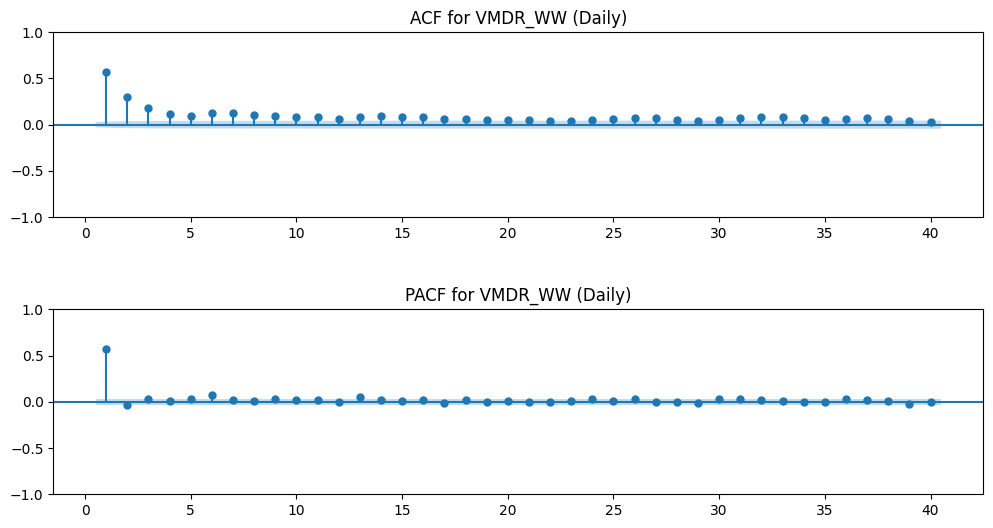

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


single_beach_data_daily = single_beach_data.resample('D').mean()
single_beach_data_weekly = single_beach_data.resample('W').mean()
single_beach_data_monthly = single_beach_data.resample('M').mean()
single_beach_data_yearly = single_beach_data.resample('Y').mean()

def plot_interactive(df, timescale, date_range, column_name, plot_type):
    if timescale == 'Hourly':
        data = df
    elif timescale == 'Daily':
        data = single_beach_data_daily
    elif timescale == 'Weekly':
        data = single_beach_data_weekly
    elif timescale == 'Monthly':
        data = single_beach_data_monthly
    elif timescale == 'Yearly':
        data = single_beach_data_yearly
    
    data = data.loc[date_range[0]:date_range[1]]
    
    if plot_type == 'Data':
        plot = data.hvplot.line('datetime', column_name, title=f'{column_name} ({timescale} Resampled Data)').opts(
            width=900, height=500, tools=['hover'], xrotation=45)
        
    else:
        fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
        plot_acf(data[column_name], zero=False, lags=40, ax=ax1)
        ax1.set_title(f'ACF for {column_name} ({timescale})')
        plot_pacf(data[column_name], zero=False, lags=40, ax=ax2)
        ax2.set_title(f'PACF for {column_name} ({timescale})')
        plt.subplots_adjust(hspace=0.5) 
        plt.show()
        plot = fig
        
    return plot

timescale_widget = widgets.Dropdown(
    options=['Hourly', 'Daily', 'Weekly', 'Monthly', 'Yearly'],
    value='Daily',
    description='Select Time Scale:'
)

plot_type_widget = widgets.Dropdown(
    options=['Data', 'ACF/PACF'],
    value='Data',
    description='Select Plot Type:'
)

start_date_widget = widgets.DatePicker(
    description='Start Date',
    value=pd.to_datetime('1979-01-01')
)

end_date_widget = widgets.DatePicker(
    description='End Date',
    value=pd.to_datetime('2021-12-31')
)

column_name_widget = widgets.Dropdown(
    options=single_beach_data_daily.columns.tolist(),
    value=single_beach_data_daily.columns.tolist()[0], 
    description='Select Column:'
)


In [24]:
widgets.VBox([
    timescale_widget,
    widgets.HBox([start_date_widget, end_date_widget]),
    column_name_widget,
    plot_type_widget
])

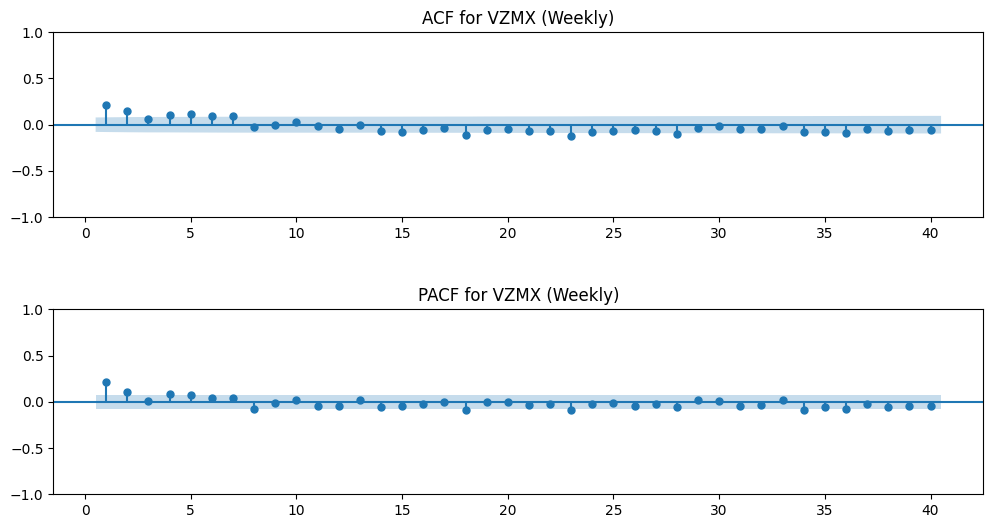

In [21]:
def update_plot(change):
    timescale = timescale_widget.value
    start_date = start_date_widget.value 
    end_date = end_date_widget.value
    column_name = column_name_widget.value
    plot_type = plot_type_widget.value
    
    date_range = (start_date, end_date)

    plot = plot_interactive(single_beach_data, timescale, date_range, column_name, plot_type)
    
    clear_output(wait=True)  
    display(plot) 

plot_type_widget.observe(update_plot, names='value')

update_plot(None)

In [181]:
#standartize the data. Consider how to handle the time, lenght, velocity and wind orientation variables.

In [ ]:
#Stationarity: Ensure that your time series data is stationary before applying the Box-Cox transform. LSTM models typically assume stationary data. 
#You may need to difference or otherwise transform your data to achieve stationarity before considering the Box-Cox transformation.


#Non-Normality: If your data exhibits non-normality, the Box-Cox transformation can be applied to make it more closely resemble a normal distribution. 
#This can be beneficial if your LSTM model assumes normally distributed errors.

#Inverse Transformation: If you apply the Box-Cox transform to your data, remember that you'll need to apply the inverse Box-Cox 
#transformation to the model's predictions to obtain forecasts in the original scale.

#One thing to point out is that the boxcox function requires the data to be positive-only. 

In [10]:
def create_lagged_features(df, lag=3):
    df_copy = df.copy()
    
    for feature in df.columns:
        for i in range(1, lag + 1):
            df_copy[f"{feature}_lag_{i}"] = df[feature].shift(i)

    df_copy = df_copy.dropna()

    return df_copy

In [11]:
def to_sequences(dataset, seq_size=10):
    x = []
    y = []

    for i in range(len(dataset) - seq_size - 1):
        window = dataset[i:(i+seq_size), :]
        x.append(window)
        y.append(dataset[i+seq_size, :])
        
    x = np.array(x)
    y = np.array(y)

    return x, y

In [27]:
def split_dataframe(df, train_ratio=0.7, valid_ratio=0.15):
    
    total_length = len(df)
    train_length = int(total_length * train_ratio)
    valid_length = int(total_length * valid_ratio)
    
    train = df.iloc[:train_length].values
    valid = df.iloc[train_length:train_length + valid_length].values
    test = df.iloc[train_length + valid_length:].values
    
    test_index = df.index[train_length + valid_length:]

    return train, valid, test, test_index

In [44]:
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from keras.layers import Dense, SimpleRNN, Dropout, LSTM, GRU
from keras.callbacks import EarlyStopping

#from tensorflow.keras.optimizers import Adam

In [28]:
train, valid, test, test_index = split_dataframe(single_beach_data_monthly)

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
valid_scaled = scaler.transform(valid)
test_scaled =scaler.transform(test)

df_scaled = scaler.transform(single_beach_data_monthly.values)

In [15]:
seq_size = 2

trainX, trainY = to_sequences(train_scaled, seq_size)
valX, valY = to_sequences(valid_scaled, seq_size)
testX, testY = to_sequences(test_scaled, seq_size)

In [1]:
def create_single_LTSM(units, dropout = 0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', 
                    input_shape=(seq_size, 19)))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(19))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'root_mean_squared_error'])

    return model

In [43]:
def create_double_LTSM(units, dropout=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', 
                    return_sequences=True, input_shape=(seq_size, 19)))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(19))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'root_mean_squared_error'])
    
    return model

In [45]:
def create_GRU(units, dropout=0.2):
    model = Sequential()
    model.add(GRU(units=units, activation='relu',
                    input_shape=(seq_size, 19)))
    model.add(Dropout(dropout))
    model.add(Dense(19))
    return model

In [17]:
model = create_single_LTSM(units=32)

In [18]:
def train_model(model,
                trainX, trainY, valX, valY,
                epochs=500,
                patience=30,
                batch_size=16):
    
    model.compile(optimizer='adam', loss='mean_squared_error',
                  metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
    
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, 
                        verbose=1, mode='auto', restore_best_weights=True)

    history = model.fit(trainX, trainY, validation_data=(valX, valY),
                        shuffle=False, epochs=epochs, 
                        batch_size=batch_size, 
                        verbose=2, callbacks=[early_stopping])

    return history

In [19]:
ltsm = train_model(model, trainX, trainY, valX, valY, epochs=500, patience=30, batch_size=32)

Epoch 1/500
12/12 - 3s - loss: 0.1968 - root_mean_squared_error: 0.4436 - mean_absolute_error: 0.4024 - val_loss: 0.1803 - val_root_mean_squared_error: 0.4246 - val_mean_absolute_error: 0.3813 - 3s/epoch - 209ms/step
Epoch 2/500
12/12 - 0s - loss: 0.1656 - root_mean_squared_error: 0.4069 - mean_absolute_error: 0.3586 - val_loss: 0.1406 - val_root_mean_squared_error: 0.3750 - val_mean_absolute_error: 0.3204 - 55ms/epoch - 5ms/step
Epoch 3/500
12/12 - 0s - loss: 0.1170 - root_mean_squared_error: 0.3420 - mean_absolute_error: 0.2784 - val_loss: 0.0862 - val_root_mean_squared_error: 0.2935 - val_mean_absolute_error: 0.2275 - 52ms/epoch - 4ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0768 - root_mean_squared_error: 0.2772 - mean_absolute_error: 0.2139 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349 - val_mean_absolute_error: 0.1823 - 50ms/epoch - 4ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0518 - root_mean_squared_error: 0.2275 - mean_absolute_error: 0.1760 - val_loss: 0.0357 - val_root_

In [40]:
def plot_forecast(model, testX, testY, history):
    fig, ax = plt.subplots(2, 1)

    pd.Series(history.history['loss']).plot(
        style='k', alpha=0.50,
        title='Loss by Epoch',
        ax=ax[0], label='loss'
    )

    pd.Series(history.history['val_loss']).plot(
        style='k', ax=ax[0], label='val_loss'
    )

    ax[0].legend()

    predicted = model.predict(testX)

    pd.Series(testY.reshape(-1)).plot(
        style='k--', alpha=0.5,
        ax=ax[1],
        title='Forecast vs Actual',
        label='actual'
    )

    pd.Series(predicted.reshape(-1)).plot(
        style='k', label='Forecast', ax=ax[1]
    )

    fig.tight_layout()
    ax[1].legend()
    plt.show()

In [38]:
testX.shape

(75, 2, 19)

3/3 [==============================] - 0s 0s/step


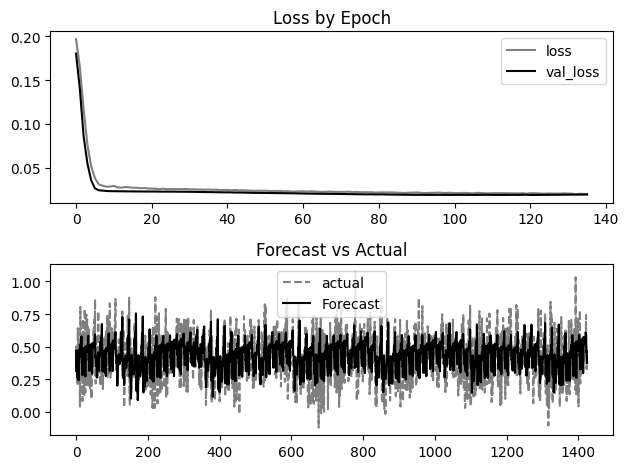

In [41]:
plot_forecast(model, testX, testY, ltsm)

In [119]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
valPredict = model.predict(valX)

3/3 [==============================] - 0s 480us/step


In [120]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

valPredict = scaler.inverse_transform(valPredict)
valY = scaler.inverse_transform(valY)

In [121]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(trainY.ravel(), trainPredict.ravel()))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY.ravel(), testPredict.ravel()))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 8.41 RMSE
Test Score: 10.01 RMSE


In [ ]:
#train_loss, train_acc = model.evaluate_generator(train_generator, steps=16) not _generator
#validation_loss, test_acc = model.evaluate_generator(validation_generator, steps=16)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
#batch normalization 

In [ ]:
#training loss, validation loss/ training, validation accuracy plot as well

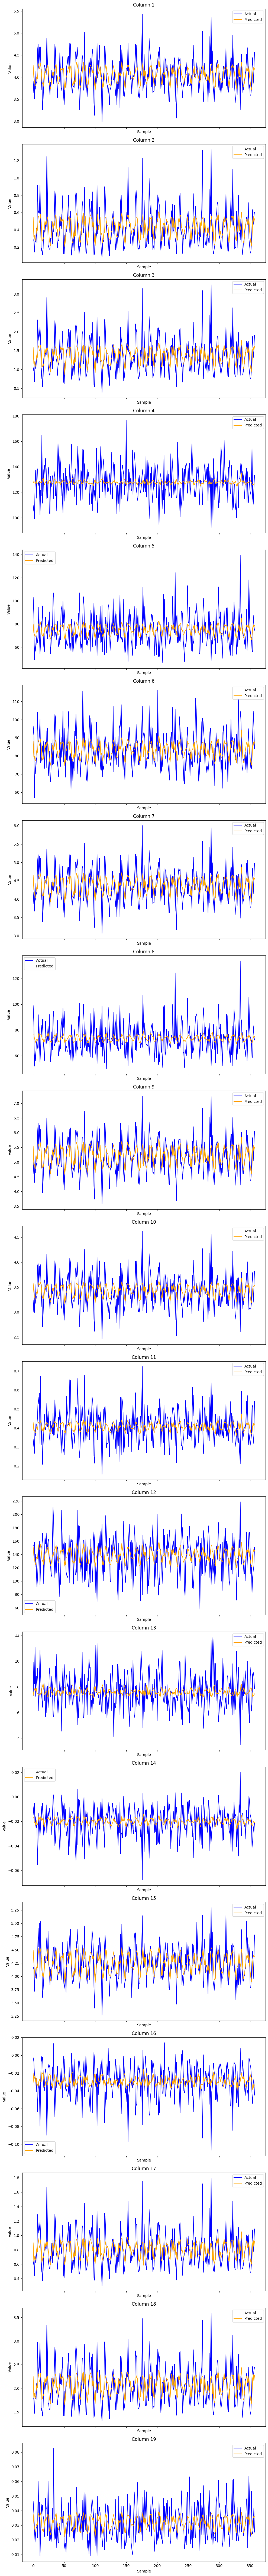

In [122]:
num_columns = trainY.shape[1]

# Create subplots for each column
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5*num_columns), sharex=True)

# Loop through each column and plot the actual vs. predicted values
for col in range(num_columns):
    actual = trainY[:, col]
    predicted = trainPredict[:, col]

    # Plot actual values in blue
    axes[col].plot(actual, label='Actual', color='blue')
    
    # Plot predicted values in orange
    axes[col].plot(predicted, label='Predicted', color='orange')
    
    # Add labels and legends
    axes[col].set_title(f'Column {col+1}')
    axes[col].set_xlabel('Sample')
    axes[col].set_ylabel('Value')
    axes[col].legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [160]:
#Tip: ACF - window size that aligns with these significant lags to capture these patterns of seasonality or temporality 
#Tip2: PACF - how many previous time steps to include in your window

In [162]:
test_loss, test_rmse, test_mae = model.evaluate(X_test_reshaped, y_test_reshaped)
print(f"Test Loss: {test_loss}, Test RMSE: {test_rmse}, Test MAE: {test_mae}")


1/1 [==============================] - 0s 22ms/step - loss: 148.7558 - root_mean_squared_error: 12.1965 - mean_absolute_error: 5.9533
Test Loss: 148.75576782226562, Test RMSE: 12.196547508239746, Test MAE: 5.953326225280762


In [ ]:
#Feature Engineering:

#Lag Features: Create lag features (i.e., features with past values of the target variable) to capture autocorrelation. Experiment with different lag values to see which ones are most informative.

In [ ]:
#AFTER making the data stationary - autocorrelation

#ACF and PACF Plots: Compute and visualize the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for each feature and the target variable. 
#These plots can help you identify the lag values with significant autocorrelation.



In [ ]:
#Normalization: LSTM models are sensitive to the scale of input data. It’s common practice to normalize your data to a range like [0, 1] or [-1, 1]. 
#You can use methods like MinMaxScaler or StandardScaler from sklearn for this. Remember to fit the scaler on your training data and use it to transform your test data.

In [ ]:
#You can help the model capture trends by including lagged values of the target variable as input features. For example, 
#if you suspect a daily trend, you can include lagged values from the same hour on previous days.

In [ ]:
#use yearly just to test the models, the code, plots and functionality. Shouldn't take long to train. First do all models. Then see where to do hourly

In [ ]:
#First split, then normalize

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

def sequence_to_sequence_forecast(df, window, horizon):
    # Extract the values from the DataFrame
    d = df.values

    x = []
    y = []

    n = len(df)

    # Create sequences of historical data and corresponding future sequences
    for i in range(n - window - horizon + 1):
        x.append(d[i:i+window])
        y.append(d[i+window:i+window+horizon])

    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Define and train an LSTM model


    # Train the model


    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Create DataFrames for the predicted and actual values
    cols_pred = [f'pred_{i}' for i in range(1, horizon+1)]
    df_pred = pd.DataFrame(y_pred, columns=cols_pred, index=df.index[-len(y_test):])
    df_actual = pd.DataFrame(y_test, columns=[f'actual_{i}' for i in range(1, horizon+1)], index=df.index[-len(y_test):])

    return pd.concat([df_actual, df_pred], axis=1)

In [54]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(single_beach_data)
single_beach_data = pd.DataFrame(scaled_data, columns=single_beach_data.columns, index=single_beach_data.index)

# Define window size and forecast horizon
window_size = 24  # Choose an appropriate window size (e.g., 24 hours)
forecast_horizon = 12  # Choose the number of hours to forecast ahead

# Call the sequence_to_sequence_forecast function with your DataFrame
result_df = sequence_to_sequence_forecast(single_beach_data, window_size, forecast_horizon)

KeyboardInterrupt: 

In [151]:
def plot_forecast(model, x_test, index, history):
    fig, ax = plt.subplots(2, 1)

    pd.Series(history.history['loss']).plot(style='k', alpha=0.5, title='Loss by Epoch', ax=ax[0], label='loss')
    pd.Series(history.history['val_loss']).plot(style='k', ax=ax[0], label='val_loss')
    ax[0].legend()

    predicted = model.predict(x_test)

    pd.Series(predicted.reshape(-1), index=index).plot(style='k', label='Forecast', ax=ax[1])
    fig.tight_layout()
    ax[1].legend()
    plt.show()